## Binary Classification Machine Learning Case Study Project

The focus of this project will be the Sonar Mines vs Rocks dataset. The problem is to predict
metal or rock objects from sonar return data. Each pattern is a set of 60 numbers in the range
0.0 to 1.0. Each number represents the energy within a particular frequency band, integrated
over a certain period of time. The label associated with each record contains the letter R if
the object is a rock and M if it is a mine (metal cylinder). The numbers in the labels are in
increasing order of aspect angle, but they do not encode the angle directly.

In [62]:
import pandas as pd
import numpy as np
from pathlib import Path
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from seaborn import set as sns_set
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
sns_set()

In [2]:
filepath = Path("../data/sonar.all-data.csv")
assert filepath.is_file
dataset = pd.read_csv(filepath, header=None)
dataset.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
33,0.0442,0.0477,0.0049,0.0581,0.0278,0.0678,0.1664,0.1490,0.0974,0.1268,...,0.0204,0.0216,0.0135,0.0055,0.0073,0.0080,0.0105,0.0059,0.0105,R
111,0.0530,0.0885,0.1997,0.2604,0.3225,0.2247,0.0617,0.2287,0.0950,0.0740,...,0.0244,0.0199,0.0257,0.0082,0.0151,0.0171,0.0146,0.0134,0.0056,M
136,0.1088,0.1278,0.0926,0.1234,0.1276,0.1731,0.1948,0.4262,0.6828,0.5761,...,0.0455,0.0213,0.0082,0.0124,0.0167,0.0103,0.0205,0.0178,0.0187,M
153,0.0233,0.0394,0.0416,0.0547,0.0993,0.1515,0.1674,0.1513,0.1723,0.2078,...,0.0104,0.0062,0.0026,0.0025,0.0061,0.0038,0.0101,0.0078,0.0006,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
58,0.0225,0.0019,0.0075,0.0097,0.0445,0.0906,0.0889,0.0655,0.1624,0.1452,...,0.0034,0.0129,0.0100,0.0044,0.0057,0.0030,0.0035,0.0021,0.0027,R
177,0.0201,0.0165,0.0344,0.0330,0.0397,0.0443,0.0684,0.0903,0.1739,0.2571,...,0.0054,0.0057,0.0137,0.0109,0.0035,0.0056,0.0105,0.0082,0.0036,M
44,0.0257,0.0447,0.0388,0.0239,0.1315,0.1323,0.1608,0.2145,0.0847,0.0561,...,0.0096,0.0153,0.0096,0.0131,0.0198,0.0025,0.0199,0.0255,0.0180,R
17,0.0192,0.0607,0.0378,0.0774,0.1388,0.0809,0.0568,0.0219,0.1037,0.1186,...,0.0331,0.0131,0.0120,0.0108,0.0024,0.0045,0.0037,0.0112,0.0075,R
68,0.0195,0.0142,0.0181,0.0406,0.0391,0.0249,0.0892,0.0973,0.0840,0.1191,...,0.0028,0.0067,0.0120,0.0012,0.0022,0.0058,0.0042,0.0067,0.0012,R


### Analyze the data

In [3]:
# dimensions
dataset.shape
# 208 instances to work with , 61 attributes including the class attribute.

(208, 61)

In [4]:
# data types
#pd.set_option('display.max_rows', 500)
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
0     208 non-null float64
1     208 non-null float64
2     208 non-null float64
3     208 non-null float64
4     208 non-null float64
5     208 non-null float64
6     208 non-null float64
7     208 non-null float64
8     208 non-null float64
9     208 non-null float64
10    208 non-null float64
11    208 non-null float64
12    208 non-null float64
13    208 non-null float64
14    208 non-null float64
15    208 non-null float64
16    208 non-null float64
17    208 non-null float64
18    208 non-null float64
19    208 non-null float64
20    208 non-null float64
21    208 non-null float64
22    208 non-null float64
23    208 non-null float64
24    208 non-null float64
25    208 non-null float64
26    208 non-null float64
27    208 non-null float64
28    208 non-null float64
29    208 non-null float64
30    208 non-null float64
31    208 non-null float64
32    208 non-null float64
33  

In [5]:
# data peek
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
dataset.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
206,0.030,0.035,0.049,0.061,0.017,0.135,0.146,0.112,0.195,0.235,...,0.009,0.005,0.013,0.004,0.004,3.400e-03,0.008,0.004,0.005,M
127,0.021,0.026,0.012,0.077,0.106,0.168,0.302,0.346,0.331,0.412,...,0.006,0.016,0.009,0.037,0.010,1.270e-02,0.029,0.013,0.002,M
195,0.013,0.014,0.031,0.037,0.077,0.079,0.066,0.111,0.178,0.225,...,0.012,0.009,0.007,0.002,0.003,5.400e-03,0.002,0.002,0.003,M
198,0.024,0.032,0.042,0.040,0.079,0.077,0.088,0.114,0.159,0.205,...,0.010,0.007,0.008,0.004,0.003,2.800e-03,0.001,0.004,0.006,M
5,0.029,0.045,0.028,0.017,0.038,0.099,0.120,0.183,0.210,0.304,...,0.004,0.001,0.004,0.001,0.009,5.700e-03,0.003,0.005,0.006,R
184,0.027,0.038,0.051,0.071,0.131,0.210,0.226,0.252,0.359,0.592,...,0.017,0.020,0.015,0.008,0.004,4.300e-03,0.003,0.005,0.006,M
84,0.038,0.032,0.042,0.035,0.179,0.164,0.089,0.082,0.178,0.205,...,0.005,0.004,0.008,0.010,0.006,6.100e-03,0.006,0.004,0.005,R
79,0.011,0.009,0.006,0.046,0.075,0.089,0.102,0.049,0.047,0.039,...,0.003,0.008,0.011,0.008,0.006,3.000e-04,0.002,0.003,0.003,R
176,0.064,0.071,0.045,0.033,0.018,0.126,0.102,0.192,0.336,0.390,...,0.005,0.003,0.009,0.007,0.009,8.600e-03,0.009,0.004,0.005,M
134,0.108,0.107,0.026,0.084,0.075,0.113,0.332,0.459,0.553,0.597,...,0.018,0.011,0.023,0.028,0.003,8.400e-03,0.012,0.008,0.014,M


### Descriptive statistics

In [6]:
# descriptive stats
dataset.describe().T
# Again, as we expect, the data has the same range, but interestingly difering mean values. There may be some benefit from standardizing the data.

,count,mean,std,min,25%,50%,75%,max
0,208.0,0.029,0.023,1.500e-03,0.013,0.023,0.036,0.137
1,208.0,0.038,0.033,6.000e-04,0.016,0.031,0.048,0.234
2,208.0,0.044,0.038,1.500e-03,0.019,0.034,0.058,0.306
3,208.0,0.054,0.047,5.800e-03,0.024,0.044,0.065,0.426
4,208.0,0.075,0.056,6.700e-03,0.038,0.062,0.100,0.401
5,208.0,0.105,0.059,1.020e-02,0.067,0.092,0.134,0.382
6,208.0,0.122,0.062,3.300e-03,0.081,0.107,0.154,0.373
7,208.0,0.135,0.085,5.500e-03,0.080,0.112,0.170,0.459
8,208.0,0.178,0.118,7.500e-03,0.097,0.152,0.233,0.683
9,208.0,0.208,0.134,1.130e-02,0.111,0.182,0.269,0.711


In [7]:
# balance of class values
dataset[60].value_counts()
# reasonably balanced classes

M    111
R     97
Name: 60, dtype: int64

### Unimodal Data Visualizations

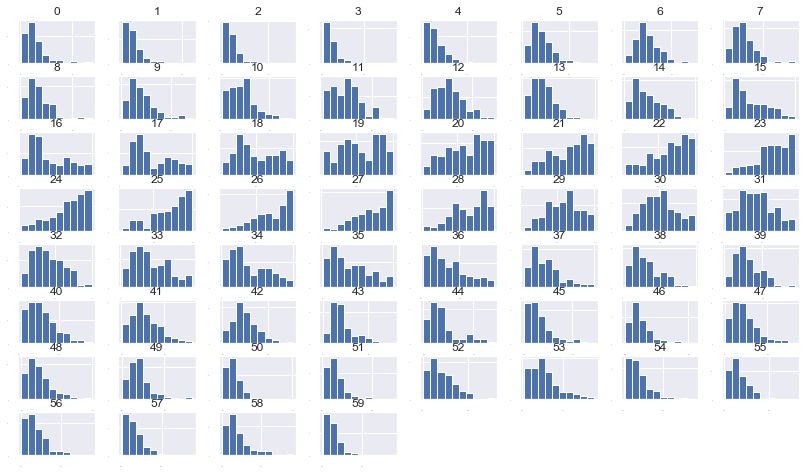

In [63]:
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(14,8));
# some bimodal, several Gaussian and a few exponential distributions

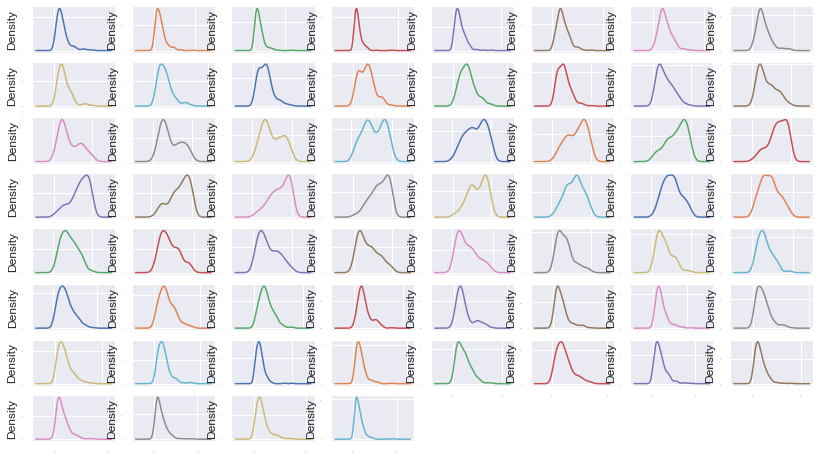

In [65]:
dataset.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False,
fontsize=1, figsize = (14,8));

This is useful, you can see that many of the attributes have a skewed distribution. **A power
transform like a Box-Cox transform that can correct for the skew in distributions might be
useful.**

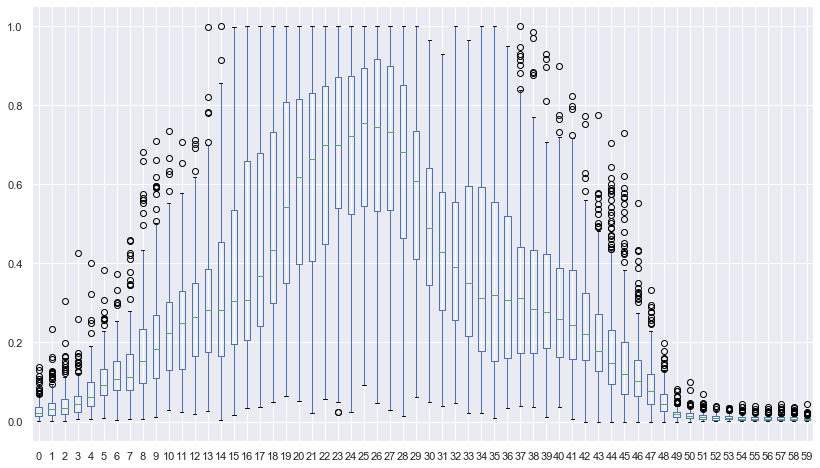

In [64]:
# box and whisker plots
dataset.boxplot(figsize=(14,8));
# Given the scales are the same, it may suggest some benefit in standardizing the data for modeling to get all of the means lined
#dataset.boxplot(figsize=(14,8), by = [60]);

In [46]:
# correlation
melt_corr = dataset.corr().assign(cols = dataset.columns[:-1]).melt(id_vars='cols', value_name = 'corr')
test  = melt_corr.loc[melt_corr['corr'] != 1].assign(corr_abs = np.abs(melt_corr['corr'])).nlargest(50, 'corr_abs').drop('corr_abs', axis =1)

test = test.rename(columns = {'cols':'var_1', 'variable':'var_2'}).reset_index(drop=True)
test[['var_1', 'var_2']] = np.sort(test[['var_1', 'var_2']], axis=1) 

# features seem paired up for correlation as seem per box plot 

In [47]:
test.drop_duplicates()

,var_1,var_2,corr
0,16,17,0.926
2,14,15,0.913
4,19,20,0.905
6,15,16,0.899
8,47,48,0.895
10,35,36,0.886
12,8,9,0.877
14,17,18,0.875
16,34,35,0.873
18,13,14,0.870


In [66]:
# correlation
corr = dataset.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

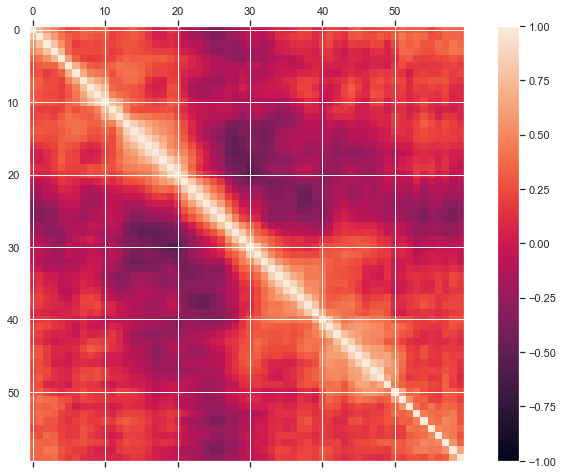

In [67]:
fig = pyplot.figure(figsize= (12, 8))
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)

The red around
the diagonal suggests that attributes that are next to each other are generally more correlated
with each other. The blue patches also suggest some moderate negative correlation the further
attributes are away from each other in the ordering. This makes sense if the order of the
attributes refers to the angle of sensors for the sonar chirp.

### Validation Dataset

In [52]:
# split and hold out for a validation dataset
array = dataset.values
X = array[:, 0:60]
y = array[:,60]
validation_size= 0.20
seed = 7
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = validation_size, random_state = seed)

### Evaluate Algorithms Baseline

We don't know what algorithms will do well on this dataset. Gut feel suggests distance based
algorithms like k-Nearest Neighbors and Support Vector Machines may do well. Let's design
our test harness. We will use 10-fold cross validation. The dataset is not too small and this is
a good standard test harness configuration. We will evaluate algorithms using the accuracy
metric. This is a gross metric that will give a quick idea of how correct a given model is. More
useful on binary classification problems like this one.

We will select a suite of different algorithms capable of working on this classification
problem. The six algorithms selected include:
- Linear Algorithms: Logistic Regression (LR) and Linear Discriminant Analysis (LDA).
- Nonlinear Algorithms: Classification and Regression Trees (CART), Support Vector
Machines (SVM), Gaussian Naive Bayes (NB) and k-Nearest Neighbors (KNN).

In [55]:
# Spot chekc algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn

results = []
names = []

# Test option and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(estimator=model, X= X_train,y= y_train,cv = kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = f"{name} {cv_results.mean()} +/- ({cv_results.std()})"
    print(msg)

LR 0.7827205882352941 +/- (0.09379612475487001)
LDA 0.7463235294117647 +/- (0.11785367885381073)
KNN 0.8080882352941176 +/- (0.06750704820308338)
CART 0.7297794117647058 +/- (0.09688389427860666)
NB 0.6488970588235294 +/- (0.1418684214516758)
SVM 0.6088235294117647 +/- (0.1186560591820866)


These are just mean accuracy values. It is always wise to look at the distribution of accuracy
values calculated across cross validation folds.

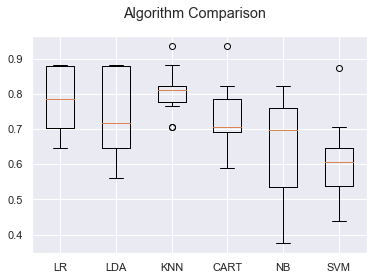

In [68]:
# compare algorithms
fig = pyplot.figure()
ax = fig.add_subplot(111)
fig.suptitle('Algorithm Comparison')
ax.set_xticklabels(names)
pyplot.boxplot(results);

It is possible that the varied distribution of the attributes is having an effect on the accuracy
of algorithms such as SVM. In the next section we will repeat this spot-check with a standardized
copy of the training dataset

In [69]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LogisticRegression(solver='lbfgs'))])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA',
LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',
GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, pipeline in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.740441 (0.094668)
ScaledLDA: 0.746324 (0.117854)
ScaledKNN: 0.825735 (0.054511)
ScaledCART: 0.747059 (0.115242)
ScaledNB: 0.648897 (0.141868)
ScaledSVM: 0.836397 (0.088697)


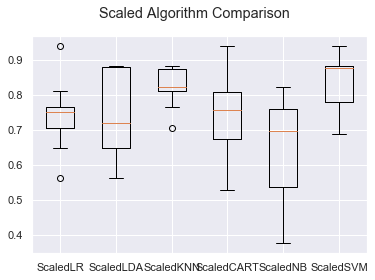

In [70]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
pyplot.boxplot(results);


The results suggest digging deeper into the SVM and KNN algorithms. It is very likely that
conguration beyond the default may yield even more accurate models.

### Algorithm Tuning

We can start off by tuning the number of neighbors for KNN. The default number of neighbors
is 7. Below we try all odd values of k from 1 to 21, covering the default value of 7. Each k value
is evaluated using 10-fold cross validation on the training standardized dataset.



In [78]:
# tune scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
kfold = KFold(n_splits=num_folds, random_state=seed)
model = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 23, 2)}
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)

In [79]:
grid_result = grid.fit(rescaledX, y_train)
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    msg =f"{mean} (+/-) ({std}) {param}"
    print(msg)

0.8493975903614458 (+/-) (0.05988110090069771) {'n_neighbors': 1}
0.8373493975903614 (+/-) (0.06630330382796286) {'n_neighbors': 3}
0.8373493975903614 (+/-) (0.03749969758430342) {'n_neighbors': 5}
0.7650602409638554 (+/-) (0.08950992596280488) {'n_neighbors': 7}
0.7530120481927711 (+/-) (0.08697897949491253) {'n_neighbors': 9}
0.7349397590361446 (+/-) (0.10489007400824805) {'n_neighbors': 11}
0.7349397590361446 (+/-) (0.10583597849547675) {'n_neighbors': 13}
0.7289156626506024 (+/-) (0.07587309410809662) {'n_neighbors': 15}
0.7108433734939759 (+/-) (0.07871598186667497) {'n_neighbors': 17}
0.7228915662650602 (+/-) (0.08455537779041811) {'n_neighbors': 19}
0.7108433734939759 (+/-) (0.10882920638633953) {'n_neighbors': 21}


C:\Users\FGiordano-Silva\AppData\Local\Continuum\miniconda3\envs\scripts\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


This is interesting as the algorithm will
make predictions using the most similar instance in the training dataset alone. This is likely due to overfitting 

We can tune two key parameters of the SVM algorithm, the value of C (how much to relax the
margin) and the type of kernel. ***The default for SVM (the SVC class) is to use the Radial
Basis Function (RBF) kernel with a C value set to 1.0. Like with KNN, we will perform a grid
search using 10-fold cross validation with a standardized copy of the training dataset***. We will
try a number of simpler kernel types and C values with less bias and more bias (less than and
more than 1.0 respectively).

In [80]:
# tune SVM
model = SVC(gamma='auto')
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = {'C':c_values, 'kernel':kernel_values}
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_result = grid.fit(X=rescaledX,y=y_train)
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
print(grid_result.best_params_)
for mean, std, param in zip(means, stds, params):
    msg =f"{mean} ({std}) {param}"
    print(msg)


{'C': 1.5, 'kernel': 'rbf'}
0.7590361445783133 (0.09886327405671058) {'C': 0.1, 'kernel': 'linear'}
0.5301204819277109 (0.11878006022028104) {'C': 0.1, 'kernel': 'poly'}
0.572289156626506 (0.13033853327360725) {'C': 0.1, 'kernel': 'rbf'}
0.7048192771084337 (0.0663596226254967) {'C': 0.1, 'kernel': 'sigmoid'}
0.7469879518072289 (0.10891253844857184) {'C': 0.3, 'kernel': 'linear'}
0.6445783132530121 (0.13229030877107076) {'C': 0.3, 'kernel': 'poly'}
0.7650602409638554 (0.09231152338173192) {'C': 0.3, 'kernel': 'rbf'}
0.7349397590361446 (0.05463116375770295) {'C': 0.3, 'kernel': 'sigmoid'}
0.7409638554216867 (0.08303483150783184) {'C': 0.5, 'kernel': 'linear'}
0.6807228915662651 (0.09863764643656386) {'C': 0.5, 'kernel': 'poly'}
0.7891566265060241 (0.06431559978182318) {'C': 0.5, 'kernel': 'rbf'}
0.7469879518072289 (0.059265219662503005) {'C': 0.5, 'kernel': 'sigmoid'}
0.7469879518072289 (0.08452539277350771) {'C': 0.7, 'kernel': 'linear'}
0.7409638554216867 (0.12796044734796017) {'C': 0.

C:\Users\FGiordano-Silva\AppData\Local\Continuum\miniconda3\envs\scripts\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


#### Ensemble Methods

Four Ensemble methods are to be used here AdaBoost, Gradient Boosting from boosting methods and Random Forest and Extra Trees for bagging methods. 
We will use the same test harness as before, 10-fold cross validation. No data standardization
is used in this case because all four ensemble algorithms are based on decision trees that are
less sensitive to data distributions.

In [81]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier(n_estimators=100)))
ensembles.append(('ET', ExtraTreesClassifier(n_estimators=100)))
results = []
names = []

for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(estimator=model, X=X_train, y=y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = f"{cv_results.mean()} ({cv_results.std()})"
    print(msg)

0.8198529411764707 (0.05829264110434879)
0.8297794117647058 (0.09185365810309579)
0.8316176470588236 (0.0742392210204031)
0.8783088235294118 (0.073132199169472)


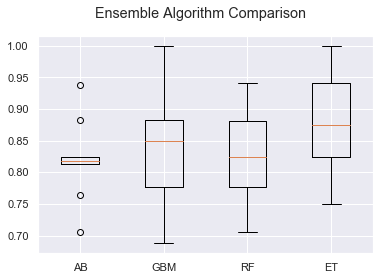

In [82]:
# compare figures
fig = pyplot.figure()
ax = fig.add_subplot(111)
fig.suptitle('Ensemble Algorithm Comparison')
ax.set_xticklabels(names)
pyplot.boxplot(results);

### Algorithm Tunning

Based on above results I've decided to tune the Extra Trees Classifier. n_estimators was the parameter used for tunning. No data transform is used. 

In [83]:
param_grid = {'n_estimators' : np.arange(50,451,50)}
model = ExtraTreesClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, y_train)
print(f"Best::{grid_result.best_score_, grid_result.best_params_}")

C:\Users\FGiordano-Silva\AppData\Local\Continuum\miniconda3\envs\scripts\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best::(0.9036144578313253, {'n_estimators': 250})


In [85]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print(f"{mean}, ({std}), {param}")

0.8554216867469879, (0.0576747896240241), {'n_estimators': 50}
0.8795180722891566, (0.08320337165879126), {'n_estimators': 100}
0.891566265060241, (0.08563407785466626), {'n_estimators': 150}
0.8855421686746988, (0.09287635425655208), {'n_estimators': 200}
0.9036144578313253, (0.07344087554359403), {'n_estimators': 250}
0.8855421686746988, (0.09287635425655208), {'n_estimators': 300}
0.891566265060241, (0.09053697810354902), {'n_estimators': 350}
0.8975903614457831, (0.08265314900007376), {'n_estimators': 400}
0.8975903614457831, (0.08265314900007376), {'n_estimators': 450}


### Finalize Model

The SVM showed the most promise as a low complexity and stable model for this problem. In
this section we will finalize the model by training it on the entire training dataset and make
predictions for the hold-out validation dataset to confirm our findings. A part of the findings was
that SVM performs better when the dataset is standardized so that all attributes have a mean
value of zero and a standard deviation of one. We can calculate this from the entire training
dataset and apply the same transform to the input attributes from the validation dataset.



In [87]:
# prepare the data
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.5, kernel='rbf')
model.fit(rescaledX, y_train)

#estimate accuracy on hold out set
rescaledHoldOutX = scaler.transform(X_validation)
predictions = model.predict(rescaledHoldOutX)

print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.8571428571428571
[[23  4]
 [ 2 13]]
              precision    recall  f1-score   support

           M       0.92      0.85      0.88        27
           R       0.76      0.87      0.81        15

    accuracy                           0.86        42
   macro avg       0.84      0.86      0.85        42
weighted avg       0.86      0.86      0.86        42



Now using an Extra Trees Classifier. 

In [88]:
model = ExtraTreesClassifier(n_estimators=250)
model.fit(X_train, y_train)

predictions = model.predict(X_validation)

print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.8809523809523809
[[24  3]
 [ 2 13]]
              precision    recall  f1-score   support

           M       0.92      0.89      0.91        27
           R       0.81      0.87      0.84        15

    accuracy                           0.88        42
   macro avg       0.87      0.88      0.87        42
weighted avg       0.88      0.88      0.88        42

